In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df=pd.read_csv(r"C:\Users\Hp\student_performance_data.csv")

In [4]:
df

,ID,Age,Gender,Hours_Studied,Attendance (%),Assignments_Submitted,Midterm_Score,Final_Score,Projects_Done,Class_Participation (%)
0,1,20,M,12,90,8,78,85,2,70
1,2,21,F,10,85,9,75,80,3,75
2,3,19,F,14,95,10,88,92,2,85
3,4,22,M,7,70,7,65,70,1,60
4,5,20,M,9,80,6,70,75,2,65
5,6,21,F,11,88,9,77,84,3,72
6,7,20,M,5,60,4,55,65,1,50
7,8,19,F,13,92,10,85,90,3,88
8,9,22,M,8,75,5,68,72,2,66
9,10,20,F,6,65,6,60,68,1,55


In [20]:
print("1.Measure of Central Tendency...")
hoursstudied_mean=df['Hours_Studied'].mean()
hoursstudied_median=df['Hours_Studied'].median()
hoursstudied_mode=df['Hours_Studied'].mode().values
print(f'Mean of Hours_Studied : {hoursstudied_mean}')
print(f'Median of Hours_Studied : {hoursstudied_median}')
print(f'Mode of Hours_Studied : {hoursstudied_mode}')


1.Measure of Central Tendency...
Mean of Hours_Studied : 9.5
Median of Hours_Studied : 9.5
Mode of Hours_Studied : [ 5  6  7  8  9 10 11 12 13 14]


In [31]:
print("2.Measure of variabilty...")
rng=df['Final_Score'].max()-df['Final_Score'].min()
var=df['Final_Score'].var()
std=df['Final_Score'].std()
print(f'The Range : {rng}')
print(f'The Variance : {var}')
print(f'The Standard Deviation : {std}')

2.Measure of variabilty...
The Range : 27
The Variance : 89.65555555555554
The Standard Deviation : 9.46866176159839


In [45]:
print("3.Frequency Distribution...")
Gender_frq=df['Gender'].value_counts()
assub_frq=df['Assignments_Submitted'].value_counts()
print(f'Gender Frequency Count :\n{Gender_frq}')
print()
print(f'Assignments submmition Frequency Count :\n{assub_frq}')

3.Frequency Distribution...
Gender Frequency Count :
Gender
M    5
F    5
Name: count, dtype: int64

Assignments submmition Frequency Count :
Assignments_Submitted
9     2
10    2
6     2
8     1
7     1
4     1
5     1
Name: count, dtype: int64


4.Box plot


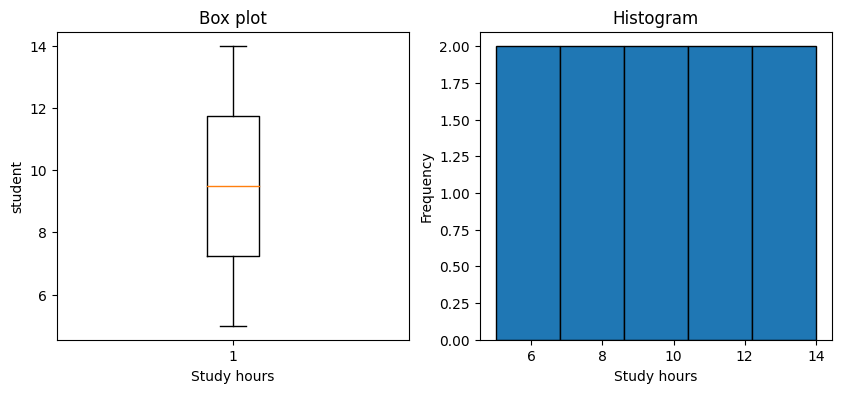

In [62]:
print("4.Box plot")
#Box Plot
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot(df['Hours_Studied'])
plt.title("Box plot")
plt.xlabel('Study hours')
plt.ylabel('student')

#Hist Plot
#plt.figure(figsize=(10,4)) --- defined only once...

plt.subplot(1,2,2)
plt.hist(df['Hours_Studied'],edgecolor='black',bins=5)
plt.title("Histogram")
plt.xlabel('Study hours')
plt.ylabel('Frequency')
plt.show()

In [69]:
print("5.Correlation Analysis...")
correlation=df['Hours_Studied'].corr(df['Final_Score'])
print(f'Correlation Between Hours_Studied and Final Score : {correlation}')
print(f'which is nearer to 1 so it is perfect positive Correlation..')
print(df['Assignments_Submitted'].corr(df['Final_Score']))

5.Correlation Analysis...
Correlation Between Hours_Studied and Final Score : 0.9941468423771584
which is nearer to 1 so it is perfect positive Correlation..
0.9116524230131285


In [14]:
print("6.Z-Score Analysis or Normalization")
df['z_score']=zscore(df['Hours_Studied'])

6.Z-Score Analysis or Normalization


In [15]:
df['z_score']

0    0.870388
1    0.174078
2    1.566699
3   -0.870388
4   -0.174078
5    0.522233
6   -1.566699
7    1.218544
8   -0.522233
9   -1.218544
Name: z_score, dtype: float64

In [34]:
Q1=df['Hours_Studied'].quantile(0.25)
Q3=df['Hours_Studied'].quantile(0.75)
IQR=Q3-Q1

lower_bound=(Q1-1.5)*IQR
upper_bound=(Q3+1.5)*IQR

#filter outliers
outliers=df[(df['Hours_Studied'] < lower_bound) | (df['Hours_Studied'] > upper_bound)]#do not use or instead use |
print("outliers in hours_studied..")
print(outliers)

outliers in hours_studied..
   ID  Age Gender  Hours_Studied  Attendance (%)  Assignments_Submitted  \
0   1   20      M             12              90                      8   
1   2   21      F             10              85                      9   
2   3   19      F             14              95                     10   
3   4   22      M              7              70                      7   
4   5   20      M              9              80                      6   
5   6   21      F             11              88                      9   
6   7   20      M              5              60                      4   
7   8   19      F             13              92                     10   
8   9   22      M              8              75                      5   
9  10   20      F              6              65                      6   

   Midterm_Score  Final_Score  Projects_Done  Class_Participation (%)  \
0             78           85              2                       70   


In [49]:
data = {'id':list(range(1,11)),
      'Final_Score':df['Final_Score']}
df = pd.DataFrame(data)
top3 = df.sort_values(by='Final_Score', ascending=False).head(3)
above_85 = df[(df['Final_Score']>85)]
print("Top 3 Scorer")
print(top3)
print()
print("student with above 85 marks")
print(above_85)

Top 3 Scorer
   id  Final_Score
2   3           92
7   8           90
0   1           85

student with above 85 marks
   id  Final_Score
2   3           92
7   8           90


In [52]:
pivot=df.pivot_table(values='Final_Score',index='Gender',aggfunc='mean')
print(pivot)

        Final_Score
Gender             
F              82.8
M              73.4


In [55]:
print("summary Report")
df=pd.read_csv(r"C:\Users\Hp\student_performance_data.csv")
summery=df.describe()
print(summery)

summary Report
             ID        Age  Hours_Studied  Attendance (%)  \
count  10.00000  10.000000       10.00000       10.000000   
mean    5.50000  20.400000        9.50000       80.000000   
std     3.02765   1.074968        3.02765       12.055428   
min     1.00000  19.000000        5.00000       60.000000   
25%     3.25000  20.000000        7.25000       71.250000   
50%     5.50000  20.000000        9.50000       82.500000   
75%     7.75000  21.000000       11.75000       89.500000   
max    10.00000  22.000000       14.00000       95.000000   

       Assignments_Submitted  Midterm_Score  Final_Score  Projects_Done  \
count                10.0000      10.000000    10.000000      10.000000   
mean                  7.4000      72.100000    78.100000       2.000000   
std                   2.1187      10.524574     9.468662       0.816497   
min                   4.0000      55.000000    65.000000       1.000000   
25%                   6.0000      65.750000    70.500000    